## Task 2 - Customer Segmentation System

```
Customer segmentation is the process of dividing a customer base into several groups that share similar characteristics. In this jupyter 
notebook, we will explore the customer base to understand the overall dataset. For that, we will Get the data ready for visualizations 
and then make Exploratory Data Analysis using visualizations to get insights.
```
Dataset used is [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download)


Some usefull Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
FIRST_FIG = 0
SECOND_FIG = 1
THIRD_FIG = 2
SUBTITLE_COLOR = "#656565"

Loading the dataset

In [ ]:
data = pd.read_csv("marketing_campaign.csv",sep = '\t')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Understanding the dataset and its columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

So there are 29 columns representing various information about customer and store

---

Now, we can define some tasks to start the exporation of data:

*   Income has null values
*   Dt_customer Dtype is not correct
*   Uniquelly categorize values of Education,Marital_Status
*   Perform Feature Engineering




---



### Pre-Processing of Data

In [ ]:
nul_values  =  data['Income'].isna().sum()
total = data.shape[0]
print(f'There are {nul_values} income null values')
print(f'This {nul_values} represents {100*nul_values/total:.2f} of the total data')

There are 24 income null values
This 24 represents 1.07 of the total data


Cleaning the dataset

In [ ]:
df = data.dropna().copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

So here we'll set two kinds of education anything above 12 is higher education else basic

In [ ]:
edu = {
    'Graduation': 'Higher education',
    'PhD': 'Higher education',
    'Master': 'Higher education',
    'Basic': 'Basic education',
    '2n Cycle': 'Basic education'
}

df['Education_new'] = df['Education'].apply(lambda x: edu[x])

In [ ]:
df['Education_new'].head()

0    Higher education
1    Higher education
2    Higher education
3    Higher education
4    Higher education
Name: Education_new, dtype: object

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Here we'll set two types of Marital_staus if its single person it'll be alone else pair

In [ ]:
mar = {
    'Single' : 'Alone',
    'Together': 'Pair',
    'Married': 'Pair',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'Alone': 'Alone',
    'Absurd': 'Alone',
    'YOLO': 'Alone'
}

df['Marital_Status_new'] = df['Marital_Status'].apply(lambda x:mar[x])

In [ ]:
df['Marital_Status_new'].head()

0    Alone
1    Alone
2     Pair
3     Pair
4     Pair
Name: Marital_Status_new, dtype: object

### Feature Engineering

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_new,Marital_Status_new
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,Higher education,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,Higher education,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,Higher education,Pair
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,Higher education,Pair
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,Higher education,Pair


So after another look on our data we are going to create some new columns to analyze our data much more thoroughly


*  Age based on year_birth and most recent Dt_Customer 
*  Children based on Kidhome and Teenhome
*  TotalMembers based on Marital_Status and Children
*  TotalSpent based on all products



In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
curr_year = df['Dt_Customer'].max().year  
df['Age'] = df['Year_Birth'].apply(lambda x: curr_year-x)

df['Children'] = df['Kidhome'] + df['Teenhome']

df['TotalMembers'] = df['Children'] + df['Marital_Status_new'].replace({'Alone': 1,'Pair': 2})

df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntFishProducts'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# df.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntFishProducts':'Fish','MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntsGoldProds':'Gold'},inplace = True)

# df.rename(columns={'NumWebPurchases':'Web','NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'},inplace=True)



In [ ]:
df.drop(['ID','Year_Birth','Marital_Status','Dt_Customer','Z_CostContact','Z_Revenue'],axis = 1 , inplace = True)


In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,TotalMembers,TotalSpent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,45.179603,0.947202,2.592509,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,0.905722,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,2.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000,3.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,3.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,3.000000,5.000000,2525.000000


In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Education_new',
       'Marital_Status_new', 'Age', 'Children', 'TotalMembers', 'TotalSpent'],
      dtype='object')

As our data has outliers we'll get rid of them

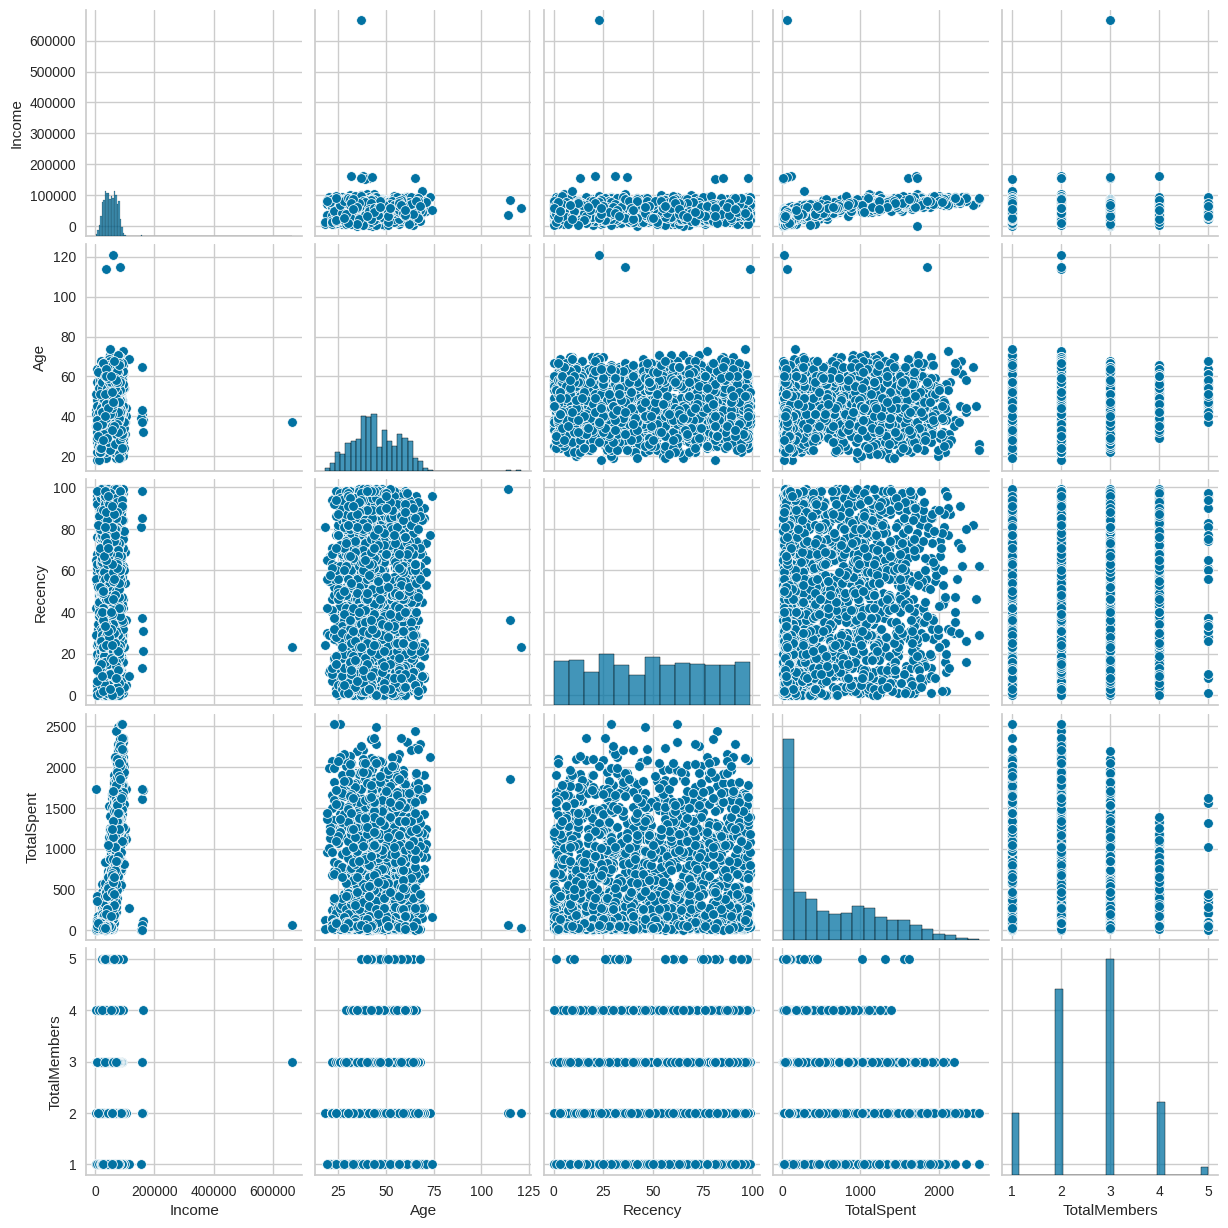

In [ ]:
sns.color_palette("Paired")
columns_to_plot = ['Income','Age','Recency','TotalSpent','TotalMembers']
sns.pairplot(df[columns_to_plot])

In [ ]:
df = df[df['Age']<90]
df = df[df['Income']<300000]

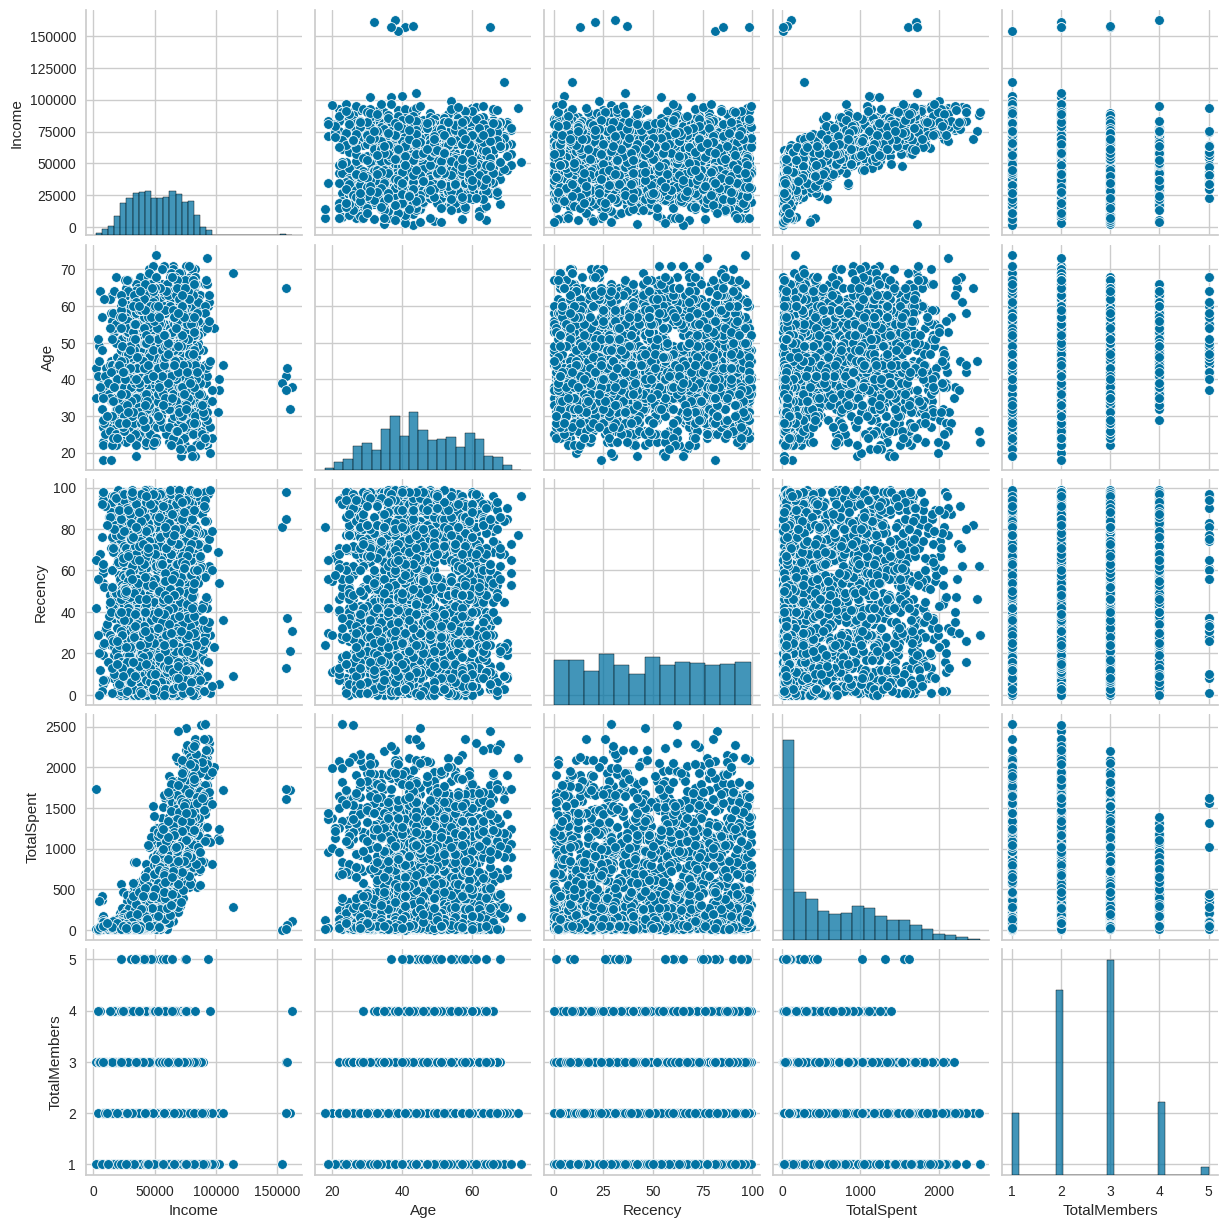

In [ ]:
sns.color_palette("Paired")
columns_to_plot = ['Income','Age','Recency','TotalSpent','TotalMembers']
sns.pairplot(df[columns_to_plot])

### Exploratory Data Analysis


---


 Understand each variable
I created some questions based on the features of this dataset so we can better understand the data:

a. How many customers per age groups do we have in this dataset?

b. What is the mean and median customers age?

c. How many customers per education level?

d. What is the customers'average and median income?

e. How many children per customers?

f. How much of each product does the grocery sell?

g. What is the customers' total spent?

h. Which promotions was most sucessful?


---



In [ ]:
dataframe = df.copy()

# creating age groups 

def group_ages(age):
  if age<20:
    return 18
  elif age<30:
    return 20
  elif age<40:
    return 30
  elif age<50:
    return 40
  elif age<60:
    return 50
  elif age<70:
    return 60
  elif age<80:
    return 70
  elif age<90:
    return 80

dataframe['Age_group'] = dataframe['Age'].apply(group_ages)

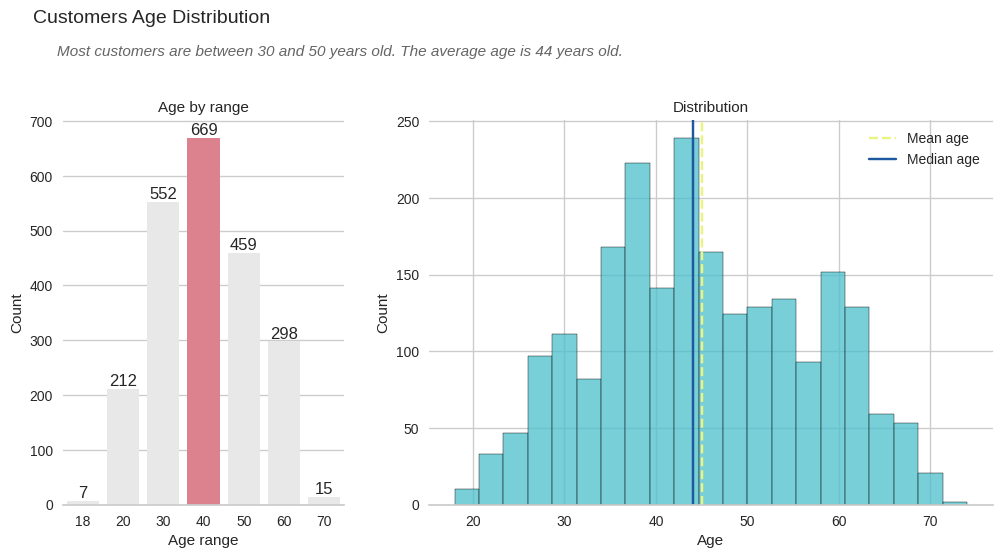

In [ ]:

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
# Variables
colors = ['#E8E8E8',
          '#E8E8E8', 
          '#E8E8E8', 
          '#EB7383', 
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8']
title = 'Customers Age Distribution'
subtitle = 'Most customers are between 30 and 50 years old. The average age is 44 years old.'

# Create subplots
fig, ax = plt.subplots(nrows=1, 
                       ncols=2, 
                       figsize=(12, 5), 
                       gridspec_kw={'width_ratios': [1, 2]})

# Bar plot
sns.countplot(data=dataframe, 
              x='Age_group', 
              ax=ax[FIRST_FIG], 
              palette=colors)
ax[FIRST_FIG].bar_label(ax[FIRST_FIG].containers[0])
ax[FIRST_FIG].set_title(label='Age by range', 
                        fontsize=11)
ax[FIRST_FIG].set(xlabel='Age range',
                  ylabel='Count')

# Histogram
sns.histplot(data=dataframe, 
             x='Age', 
             ax=ax[SECOND_FIG], 
             color='#4BBFCC')

mean_age = dataframe['Age'].mean() # calc mean age
median_age = dataframe['Age'].median() # calc median age

ax[SECOND_FIG].set(xlabel='Age',
                   ylabel='Count')
ax[SECOND_FIG].set_title(label='Distribution',
                         fontsize=11)
ax[SECOND_FIG].axvline(mean_age, 
                       color='#EBF383', 
                       ls="--", 
                       label="Mean age") #line mean age
ax[SECOND_FIG].axvline(median_age, 
                       color="#1E589E", 
                       ls="-", 
                       label="Median age") # line median age
# ax[SECOND_FIG].xlabel('hi')
ax[SECOND_FIG].legend()

sns.despine(left=True)

# title
fig.suptitle(title,
             x=0.1, 
             y=1.1, 
             horizontalalignment='left', 
             verticalalignment='top', 
             fontsize=14)

fig.text(0.12, 
         1.03, 
         subtitle, 
         horizontalalignment='left', 
         verticalalignment='top', 
         color=SUBTITLE_COLOR,
         fontstyle="italic", 
         fontsize = 11)
print()

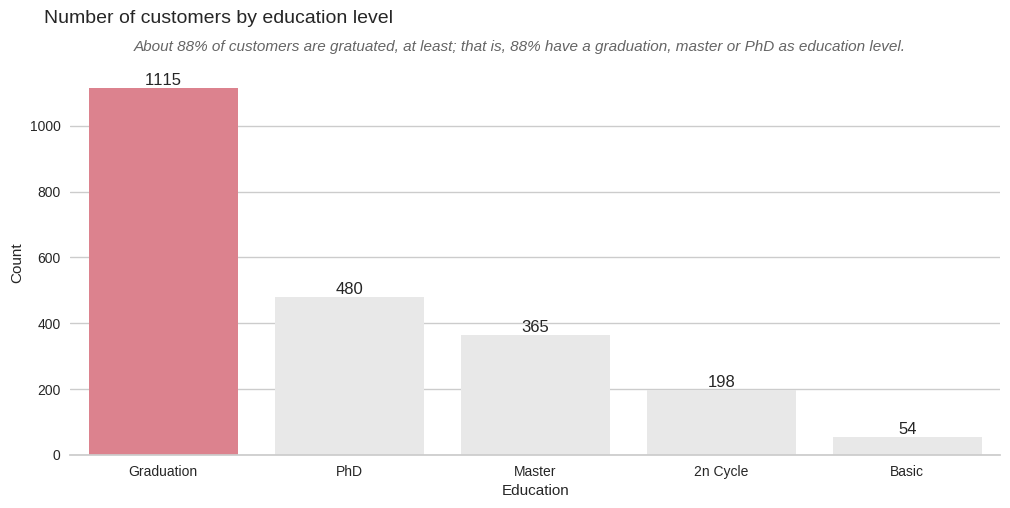

In [ ]:
plt.figure(figsize=(12, 5))

# variabels
colors = ['#EB7383',
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8']
title = "Number of customers by education level"
subtitle = 'About 88% of customers are gratuated, at least; that is,\
 88% have a graduation, master or PhD as education level.'
label_order = ['Graduation',
               'PhD',
               'Master',
               '2n Cycle',
                'Basic']

# plot figure
fig = sns.countplot(data=dataframe, 
                    x='Education', 
                    palette=colors,
                    order=label_order)

# Setting up layout
fig.set(ylabel='Count')
fig.bar_label(fig.containers[0])
plt.title(title, 
          x=0.16,
          y=1.1,
          fontsize=14)
plt.suptitle(subtitle,  
         color=SUBTITLE_COLOR,
         x=0.5,
         y=0.94,
         fontstyle="italic",
         fontsize = 11)

sns.despine(left=True)


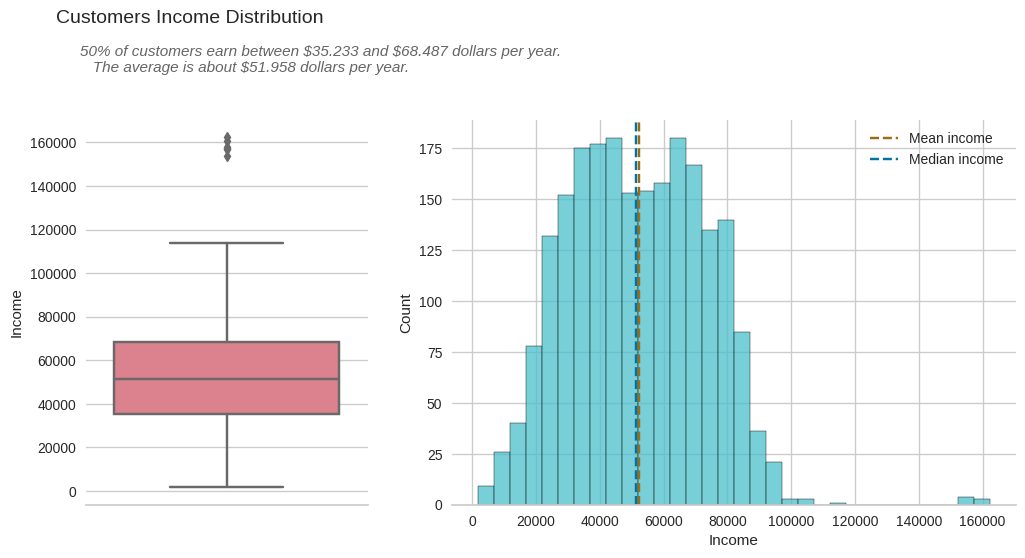

In [ ]:

# Creating subplots
fig, ax = plt.subplots(nrows=1, 
                       ncols=2,
                       figsize=(12, 5), 
                       gridspec_kw={'width_ratios': [1, 2]})
#variabls
mean_income = data['Income'].mean()
median_income = data['Income'].median()
title = 'Customers Income Distribution'
subtitle = '50% of customers earn between \$35.233 and \$68.487 dollars per year.\
 \n   The average is about \$51.958 dollars per year.'

# Plot boxplot
ax2 = sns.boxplot(data=dataframe,
                  y='Income',
                  ax=ax[0],
                  color='#EB7383')

# Plot histogram
ax1 = sns.histplot(data=dataframe, 
             x='Income', 
             color='#4BBFCC',
             ax=ax[1])
ax1.axvline(mean_income, # plot line mean income
            color='#9E6B0E', 
            ls="--", 
            label="Mean income")
ax1.axvline(median_income, # plot line mean age
            ls="--", 
            label="Median income") 
ax1.legend()

# setting up figure
fig.suptitle(title,
             x=0.1, 
             y=1.1, 
             horizontalalignment='left', 
             verticalalignment='top', 
             fontsize=14)

fig.text(0.12, 
         1.03, 
         subtitle, 
         horizontalalignment='left', 
         verticalalignment='top', 
         color=SUBTITLE_COLOR,
         fontstyle="italic", 
         fontsize = 11)


sns.despine(left=True)

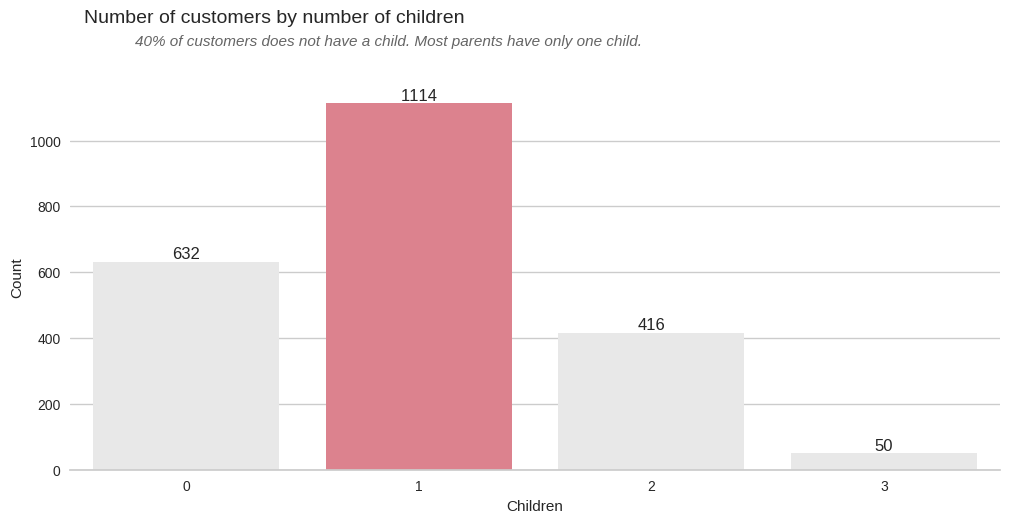

In [ ]:
plt.figure(figsize=(12,5))

# variables
colors = ['#E8E8E8', 
          '#EB7383',
          '#E8E8E8', 
          '#E8E8E8']
title = 'Number of customers by number of children'
subtitle = '40% of customers does not have a child. Most parents have only one child.'

# Plot bar figure
fig = sns.countplot(data=dataframe, 
                    x='Children',
                    palette=colors)

# Setting up figure
fig.bar_label(fig.containers[0])
fig.set(ylabel='Count')
plt.title(label=title,
          x=0.22,
          y=1.14,
          fontsize=14)
plt.suptitle(subtitle,  
         color="#656565",
         x=0.39,
         y=0.98,
         fontstyle="italic",
         fontsize = 11)
sns.despine(left=True)


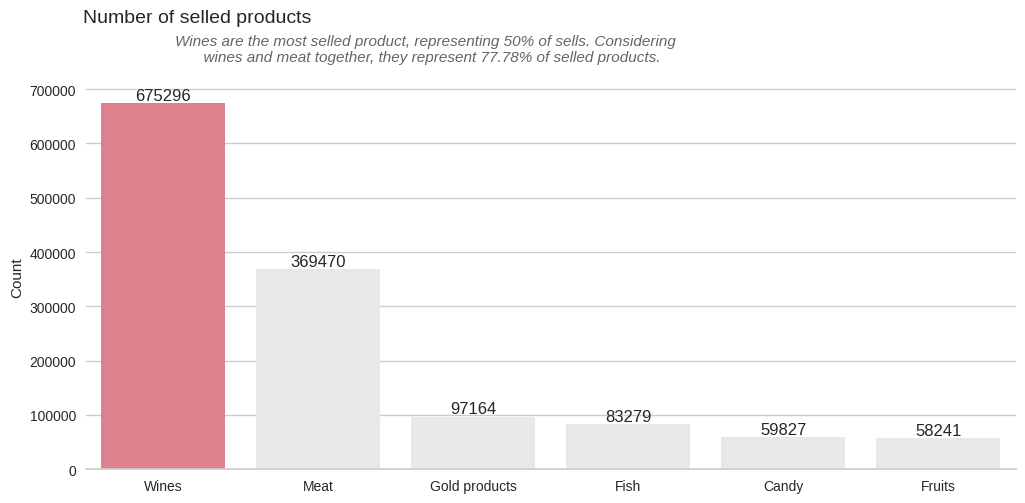

In [ ]:
fruit_cols = ['MntWines', 
              'MntFruits',
              'MntMeatProducts', 
              'MntFishProducts', 
              'MntSweetProducts',
              'MntGoldProds']

# Simplify names
fruit_dict = {'MntWines': 'Wines', 
              'MntFruits': 'Fruits', 
              'MntMeatProducts': 'Meat', 
              'MntFishProducts': 'Fish', 
              'MntSweetProducts': 'Candy',
              'MntGoldProds': 'Gold products'}

# Variabels
colors = ['#EB7383',
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8',
          '#E8E8E8',
          '#E8E8E8']
title = 'Number of selled products'
subtitle = 'Wines are the most selled product, representing 50% of sells. Considering \n \
 wines and meat together, they represent 77.78% of selled products.'

# Calc number of each product
fruits = pd.DataFrame(dataframe[fruit_cols].sum().sort_values(ascending=False))

# Replace names
fruits.index = fruits.index.map(fruit_dict)

# Figure size
plt.figure(figsize=(12, 5))

# Plot figure
fig = sns.barplot(data=fruits,
            x=fruits.index,
            y=0,
            palette=colors)

# Configure figure
fig.set(ylabel='Count')
plt.title(label=title, 
          x=0.12,
          y=1.14,
         fontsize=14)
plt.suptitle(subtitle, 
             color="#656565",
             x=0.41,
             y=0.98,
             fontstyle="italic",
             fontsize = 11)
fig.bar_label(fig.containers[0])
sns.despine(left=True)


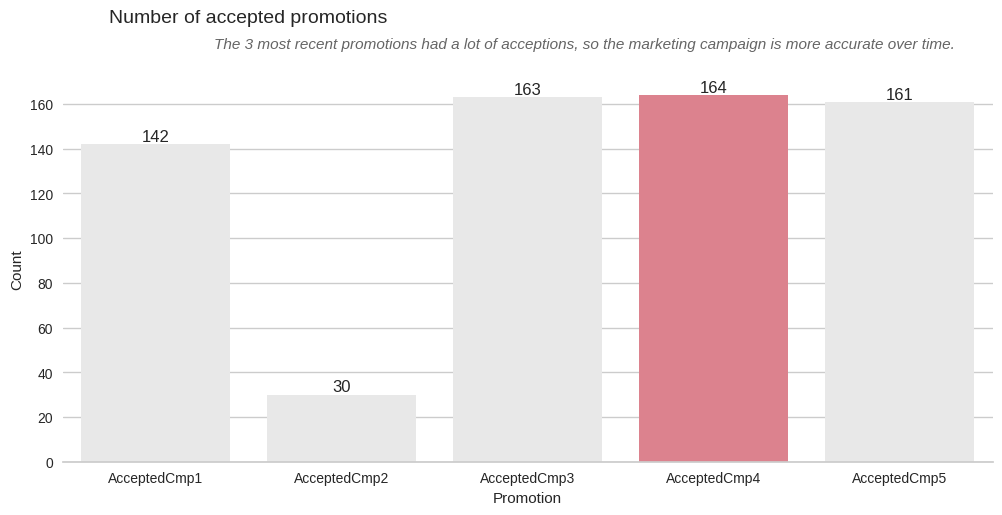

In [ ]:
plt.figure(figsize=(12, 5))

# Variables
colors = ['#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8',
          '#EB7383',
          '#E8E8E8']
title = 'Number of accepted promotions'
subtitle = 'The 3 most recent promotions had a lot of acceptions, so the marketing campaign is more accurate\
 over time.'
columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
promotions = pd.DataFrame(dataframe[columns].sum())

# Plot figure
fig = sns.barplot(data=promotions, 
            y=0, 
            x=promotions.index,
            palette=colors)

# Setting up figure
fig.bar_label(fig.containers[0])
plt.title(label=title,
          x=0.2,
          y=1.12,
          fontsize=14)
plt.suptitle(subtitle,  
             color=SUBTITLE_COLOR,
             x=0.56,
             y=0.96,
             fontstyle="italic",
             fontsize = 11)
fig.set(ylabel='Count',
        xlabel='Promotion')

sns.despine(left=True)


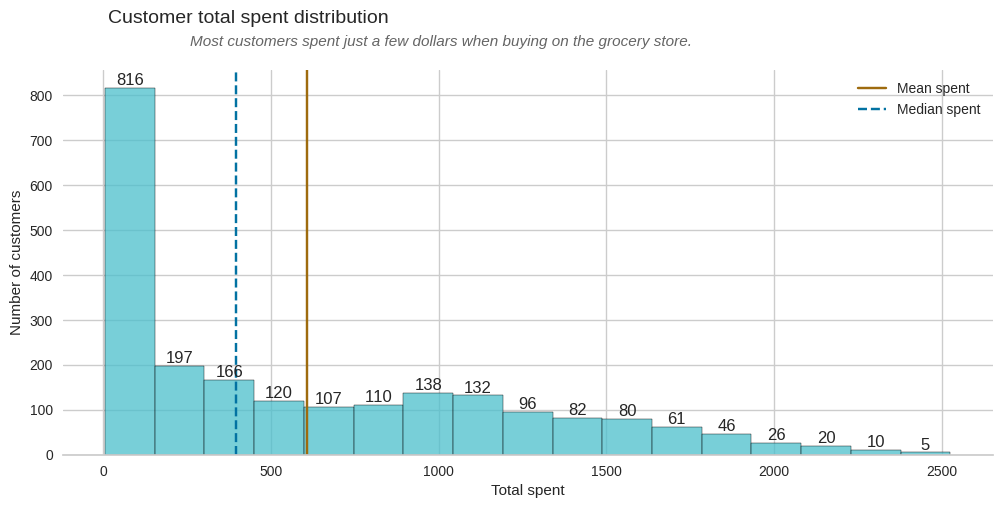

In [ ]:
# Set figure size
plt.figure(figsize=(12, 5))

# Variables
colors = ['#E8E8E8', 
          '#51cedb',
          '#E8E8E8', 
          '#E8E8E8']
title = 'Customer total spent distribution'
subtitle = 'Most customers spent just a few dollars when buying on the grocery store.'
mean_income = dataframe['TotalSpent'].mean()
median_income = dataframe['TotalSpent'].median()

# Plot figure
fig = sns.histplot(data=dataframe, 
                   x='TotalSpent',
                   color='#4BBFCC')
fig.axvline(mean_income, # plot line mean income
            color='#9E6B0E', 
            ls="-", 
            label="Mean spent")
fig.axvline(median_income, # plot line mean age
            ls="--", 
            label="Median spent")
fig.bar_label(fig.containers[0])

# Setting up figure
fig.set(xlabel='Total spent',ylabel='Number of customers')
plt.title(label=title,
          x=0.2,
          y=1.1,
          fontsize=14)
plt.suptitle(subtitle,  
         color="#656565",
         x=0.44,
         y=0.95,
         fontstyle="italic",
         fontsize = 11)
fig.legend()

sns.despine(left=True)


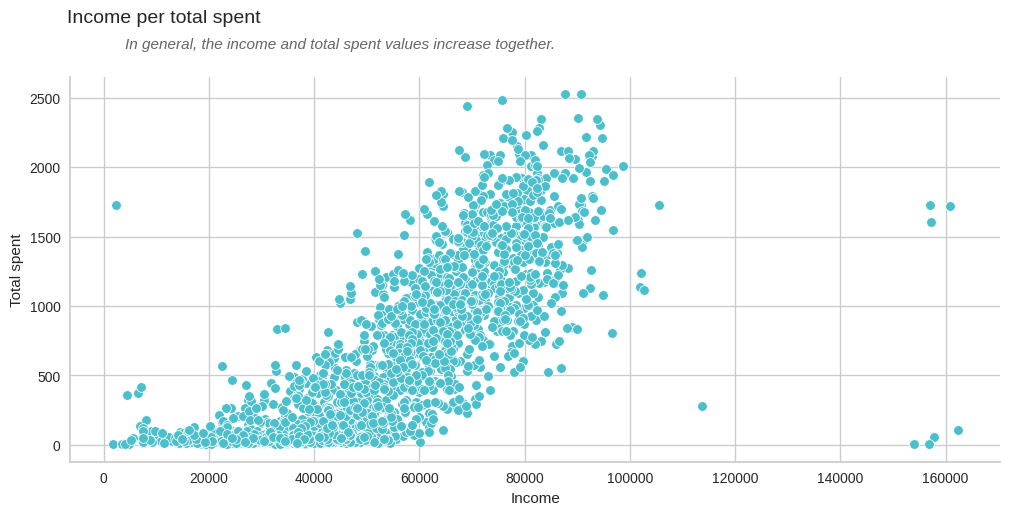

In [ ]:
# Set figure size
plt.figure(figsize=(12, 5))

# Variables
title = 'Income per total spent'
subtitle = 'In general, the income and total spent values increase together.'

# Plot scatterplot
fig = sns.scatterplot(data=dataframe,
                x='Income',
                y='TotalSpent',
                color='#4BBFCC')

# Setting up figure
plt.title(label=title,
          x=0.1,
          y=1.12,
          fontsize=14)
plt.suptitle(subtitle,  
             color=SUBTITLE_COLOR,
             x=0.35,
             y=0.96,
             fontstyle="italic",
             fontsize = 11)
fig.set(ylabel='Total spent',
        xlabel='Income')

sns.despine()


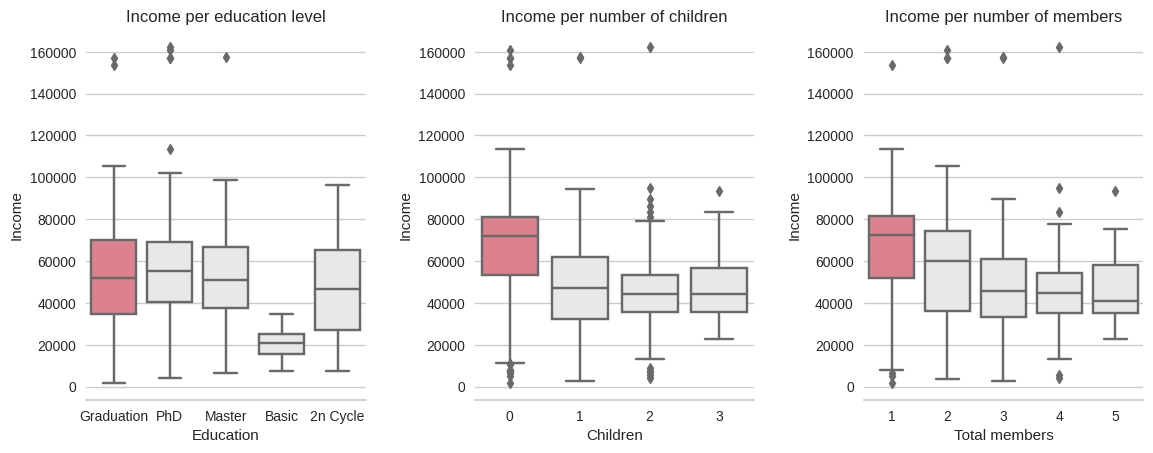

In [ ]:
# Variables
colors_graph_1 = ['#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_2 = ['#EB7383', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_3 = ['#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

fig, ax = plt.subplots(nrows=1, 
                       ncols=3, 
                       figsize=(12, 5))
# income vs Education
sns.boxplot(data=dataframe, 
            x='Education', 
            y='Income', 
            ax=ax[FIRST_FIG], 
            palette=colors_graph_1)
ax[FIRST_FIG].set_title(label='Income per education level',
                        fontsize=12)

# Income vs Children
sns.boxplot(data=dataframe, 
            x='Children', 
            y='Income', 
            ax=ax[SECOND_FIG],
            palette=colors_graph_2)
ax[SECOND_FIG].set_title(label='Income per number of children',
                        fontsize=12)

sns.boxplot(data=dataframe, 
            x='TotalMembers', 
            y='Income', 
            ax=ax[THIRD_FIG],
            palette=colors_graph_3)
ax[THIRD_FIG].set_title(label='Income per number of members',
                        fontsize=12)
ax[THIRD_FIG].set(xlabel='Total members')


sns.despine(left=True)

fig.tight_layout(pad=2.0)


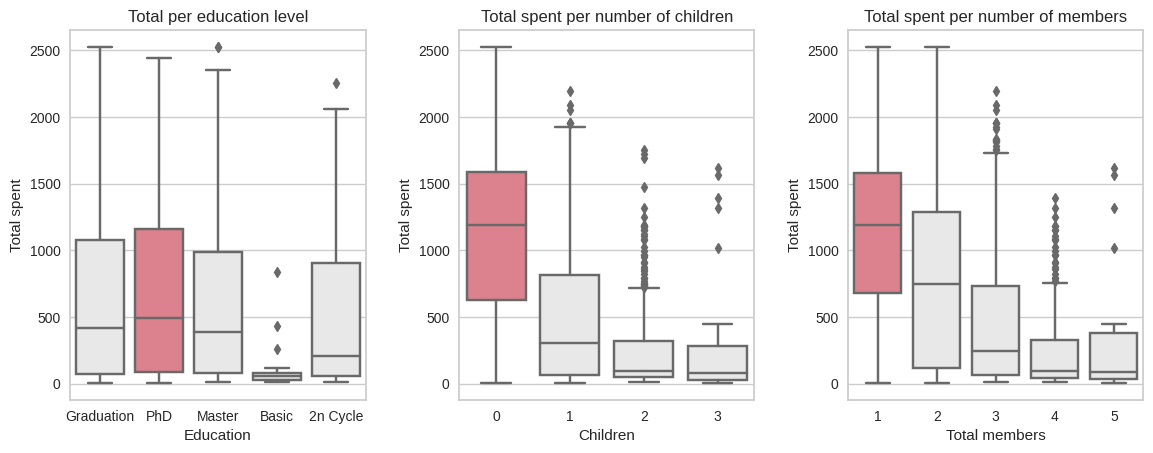

In [ ]:
# Variables
colors_graph_1 = ['#E8E8E8',
                  '#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_2 = ['#EB7383', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_3 = ['#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

# Creating figure
fig, ax = plt.subplots(nrows=1, 
                       ncols=3, 
                       figsize=(12, 5))
# Plot Income vs Education
sns.boxplot(data=dataframe, 
            x='Education', 
            y='TotalSpent', 
            ax=ax[FIRST_FIG],
            palette=colors_graph_1)

ax[FIRST_FIG].set_title(label='Total per education level',
                        fontsize=12)

ax[FIRST_FIG].set(ylabel='Total spent')

# Plot Income vs Children
sns.boxplot(data=dataframe, 
            x='Children', 
            y='TotalSpent', 
            ax=ax[SECOND_FIG],
            palette=colors_graph_2)

ax[SECOND_FIG].set_title(label='Total spent per number of children',
                        fontsize=12)

ax[SECOND_FIG].set(ylabel='Total spent')

# Plot Income vs TotalMembers
sns.boxplot(data=dataframe, 
            x='TotalMembers', 
            y='TotalSpent', 
            ax=ax[THIRD_FIG],
            palette=colors_graph_3)
ax[THIRD_FIG].set_title(label='Total spent per number of members',
                        fontsize=12)
ax[THIRD_FIG].set(ylabel='Total spent',
                  xlabel='Total members')

fig.tight_layout(pad=2.0)


<Axes: title={'center': 'Feature correlation'}>

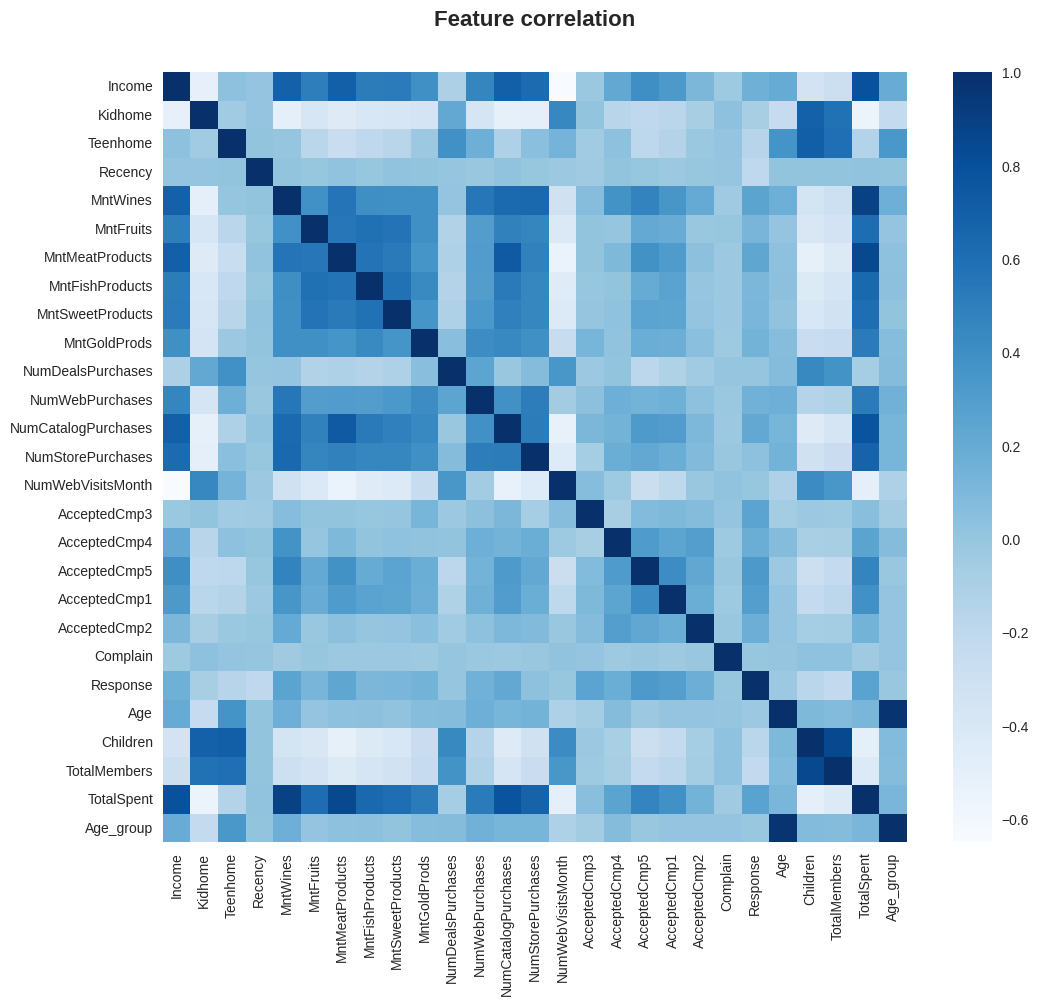

In [ ]:
import numpy as np
data = dataframe.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12,10))
plt.title('Feature correlation', weight='bold', fontsize=16, y=1.05)
sns.heatmap(dataframe[data].corr(),cmap = 'Blues')

### Data Processing

In [ ]:
from pandas import get_dummies
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataframe.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntFishProducts':'Fish','MntMeatProducts':'Meat','MntSweetProducts':'Sweets','MntsGoldProds':'Gold'},inplace = True)


In [ ]:
obj_feat = dataframe.select_dtypes(exclude =  [np.number]).columns

dummies = get_dummies(dataframe[obj_feat],drop_first = True)
df_final = pd.concat([dataframe, dummies],axis = 1)
df_final.drop(obj_feat, axis = 1, inplace = True)
df_final.shape

(2212, 33)

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_final)

df_final_scaled = pd.DataFrame(scaled, columns = df_final.columns)
df_final_scaled.head()


,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,MntGoldProds,...,Children,TotalMembers,TotalSpent,Age_group,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Education_new_Higher education,Marital_Status_new_Pair
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,-1.264598,-1.758359,1.676245,0.788804,-0.158187,0.991895,-0.444542,-0.526437,0.358569,-1.349603
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,1.404572,0.449070,-0.963297,1.618335,-0.158187,0.991895,-0.444542,-0.526437,0.358569,-1.349603
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,-1.264598,-0.654644,0.280110,-0.040727,-0.158187,0.991895,-0.444542,-0.526437,0.358569,0.740959
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,0.069987,0.449070,-0.920135,-0.870257,-0.158187,0.991895,-0.444542,-0.526437,0.358569,0.740959
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,0.069987,0.449070,-0.307562,-0.870257,-0.158187,-1.008171,-0.444542,1.899561,0.358569,0.740959


In [ ]:
le = LabelEncoder()

for obj in obj_feat[:-1]:
    trans = le.fit_transform(dataframe[obj])
    dataframe[obj] = trans

### Clustering

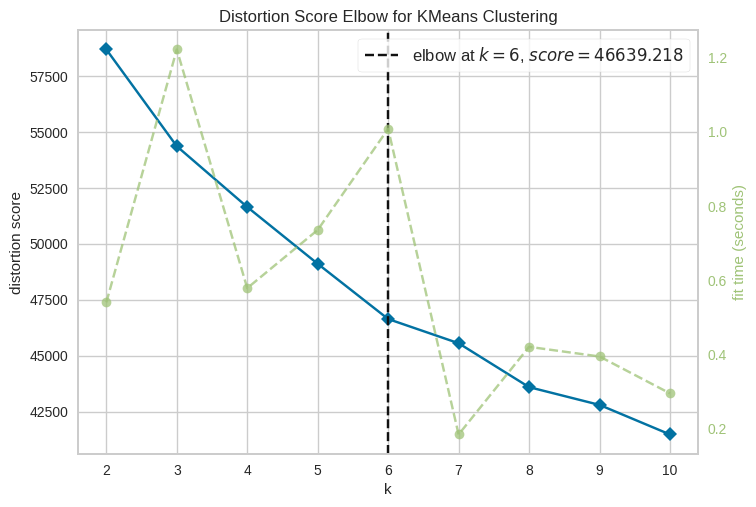

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow = KElbowVisualizer(KMeans(random_state = 123),k=10)
elbow.fit(df_final_scaled)
elbow.show()

In [ ]:
model = KMeans(n_clusters=5, random_state=123)
yhat = model.fit_predict(df_final_scaled)

dataframe['Cluster'] = yhat

<Axes: xlabel='Cluster', ylabel='count'>

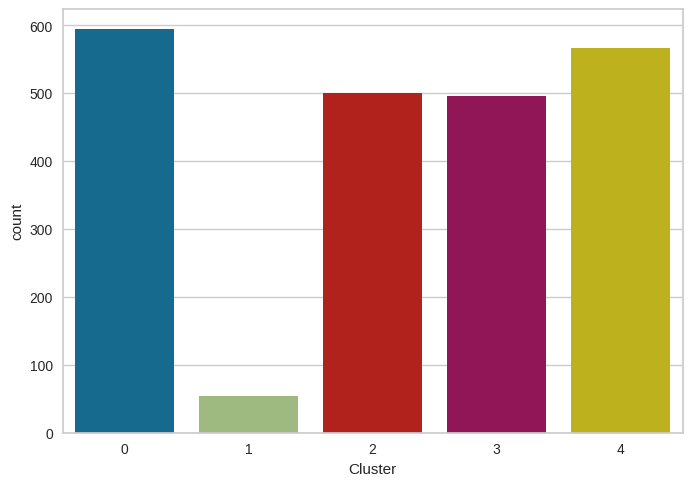

In [ ]:
sns.countplot(data = dataframe , x="Cluster")

### Customer Profiling

<Axes: label='2', xlabel='Cluster', ylabel='Income'>

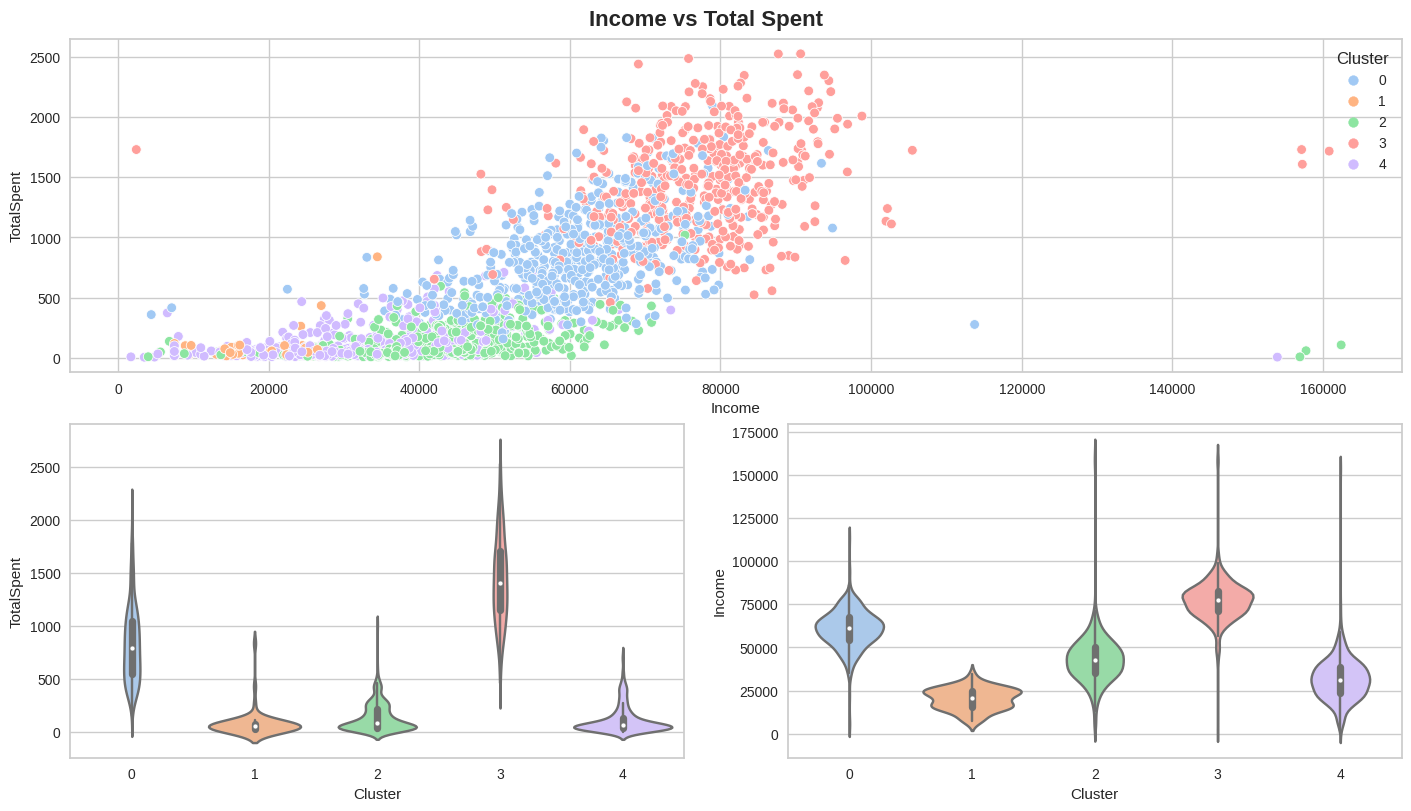

In [ ]:
fig, axd = plt.subplot_mosaic([[0,0],[1,2]], constrained_layout=True, figsize=(14,8))
fig.suptitle('Income vs Total Spent', weight='bold', fontsize=16)

sns.scatterplot(data=dataframe, x='Income', y='TotalSpent', hue='Cluster', palette='pastel', ax=axd[0])
sns.violinplot(data=dataframe, x='Cluster', y='TotalSpent', palette='pastel', ax=axd[1])
sns.violinplot(data=dataframe, x='Cluster', y='Income', palette='pastel', ax=axd[2])

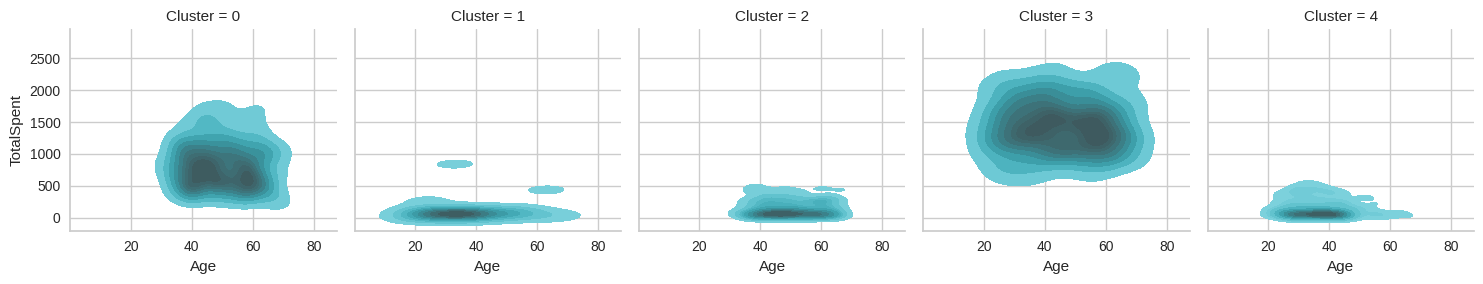

In [ ]:
g = sns.FacetGrid(data=dataframe, col='Cluster')
g.map(sns.kdeplot, 'Age', 'TotalSpent', color='#4BBFCC', fill=True)

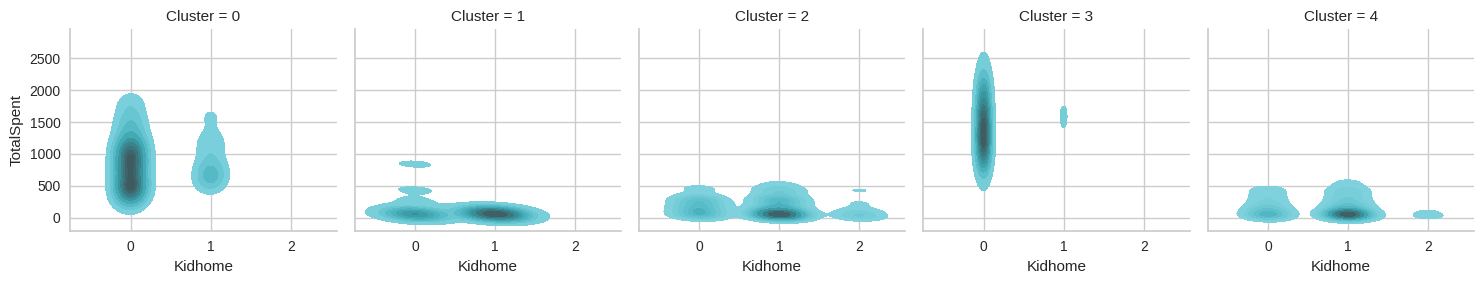

In [ ]:
g = sns.FacetGrid(data=dataframe, col='Cluster')
g.map(sns.kdeplot, 'Kidhome', 'TotalSpent', color='#4BBFCC', fill=True)


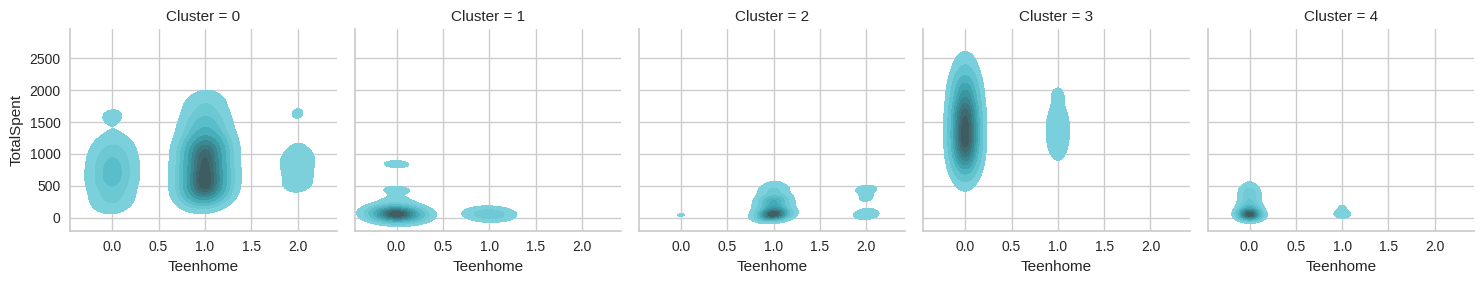

In [ ]:
g = sns.FacetGrid(data=dataframe, col='Cluster')
g.map(sns.kdeplot, 'Teenhome', 'TotalSpent', color='#4BBFCC', fill=True)


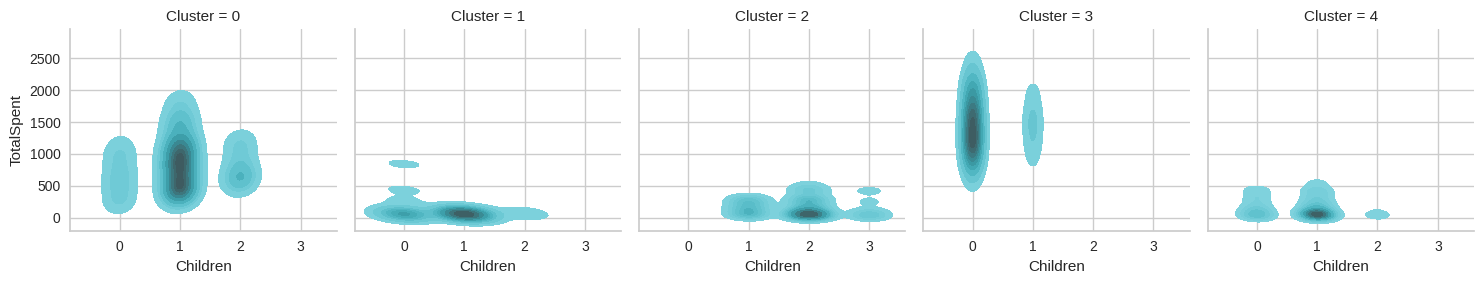

In [ ]:
g = sns.FacetGrid(data=dataframe, col='Cluster')
g.map(sns.kdeplot, 'Children', 'TotalSpent', color='#4BBFCC', fill=True)

Text(0.6, 3400, '0: Graduate\n1: Postgraduate\n2: Undergraduate')

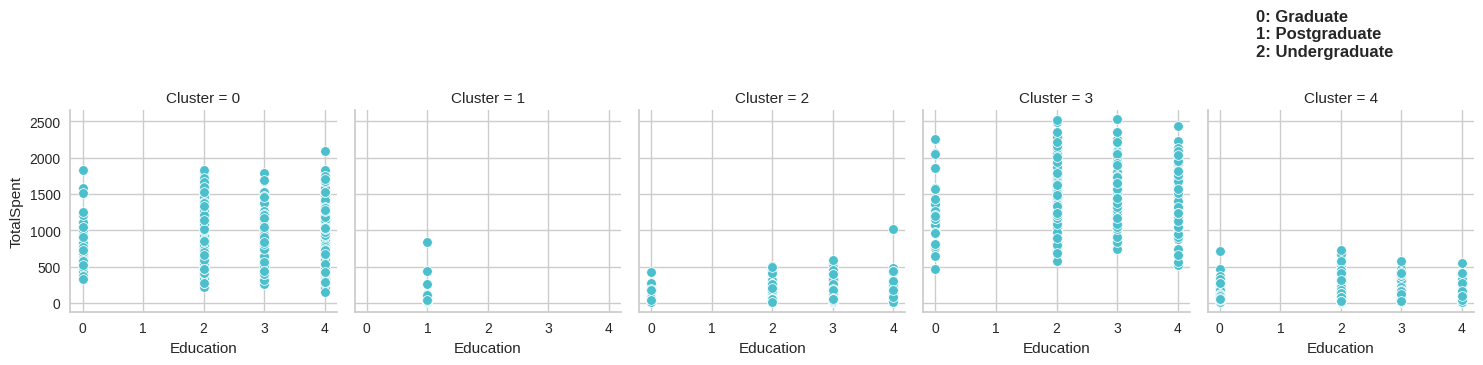

In [ ]:
g = sns.FacetGrid(data=dataframe, col='Cluster')
g.map(sns.scatterplot, 'Education', 'TotalSpent', color='#4BBFCC')

plt.text(0.6,3400, '0: Graduate\n1: Postgraduate\n2: Undergraduate', weight='bold', fontsize=12)

<Axes: title={'center': "Average Number of Days Since Customer's Last Purchase\nby Clusters"}, xlabel='Cluster', ylabel='Recency'>

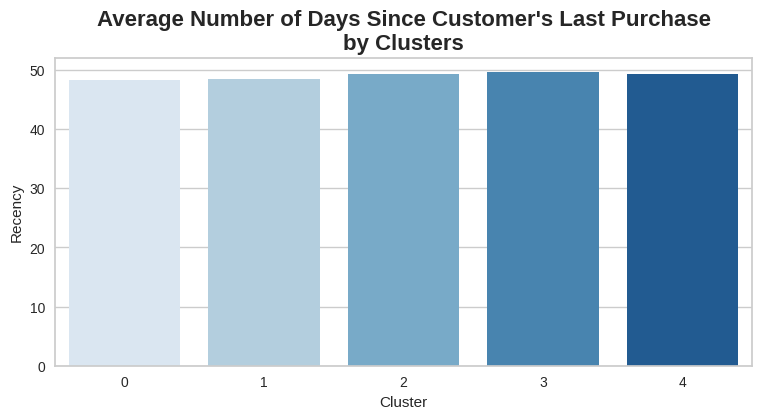

In [ ]:
plt.figure(figsize=(9,4))
plt.title("Average Number of Days Since Customer's Last Purchase\nby Clusters", weight='bold', fontsize=16)
sns.barplot(data=dataframe, x='Cluster', y='Recency', palette='Blues', ci=None)


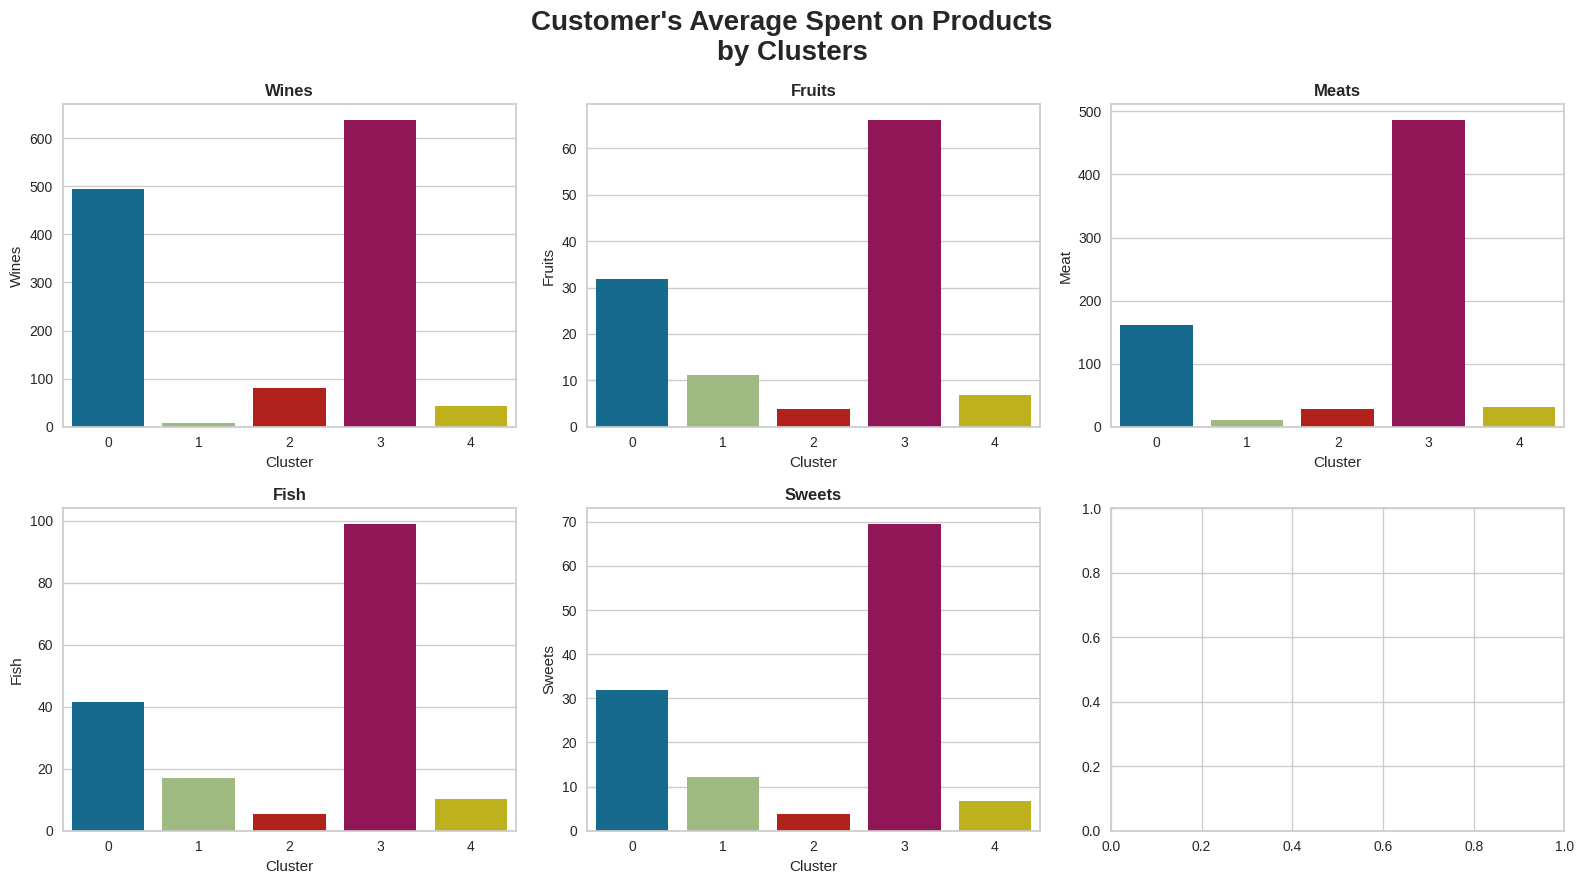

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(16,9))
fig.suptitle("Customer's Average Spent on Products\nby Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=dataframe, x='Cluster', y='Wines', ci=None, ax=axes[0])
axes[0].set_title('Wines', weight='bold')
sns.barplot(data=dataframe, x='Cluster', y='Fruits',  ci=None, ax=axes[1])
axes[1].set_title('Fruits', weight='bold')
sns.barplot(data=dataframe, x='Cluster', y='Meat',  ci=None, ax=axes[2])
axes[2].set_title('Meats', weight='bold')
sns.barplot(data=dataframe, x='Cluster', y='Fish',  ci=None, ax=axes[3])
axes[3].set_title('Fish', weight='bold')
sns.barplot(data=dataframe, x='Cluster', y='Sweets', ci=None, ax=axes[4])
axes[4].set_title('Sweets', weight='bold')
# sns.barplot(data=dataframe, x='Cluster', y='Gold',  ci=None, ax=axes[5])
# axes[5].set_title('Gold', weight='bold')

plt.tight_layout()


Text(0.5, 1.0, 'Campaign 5')

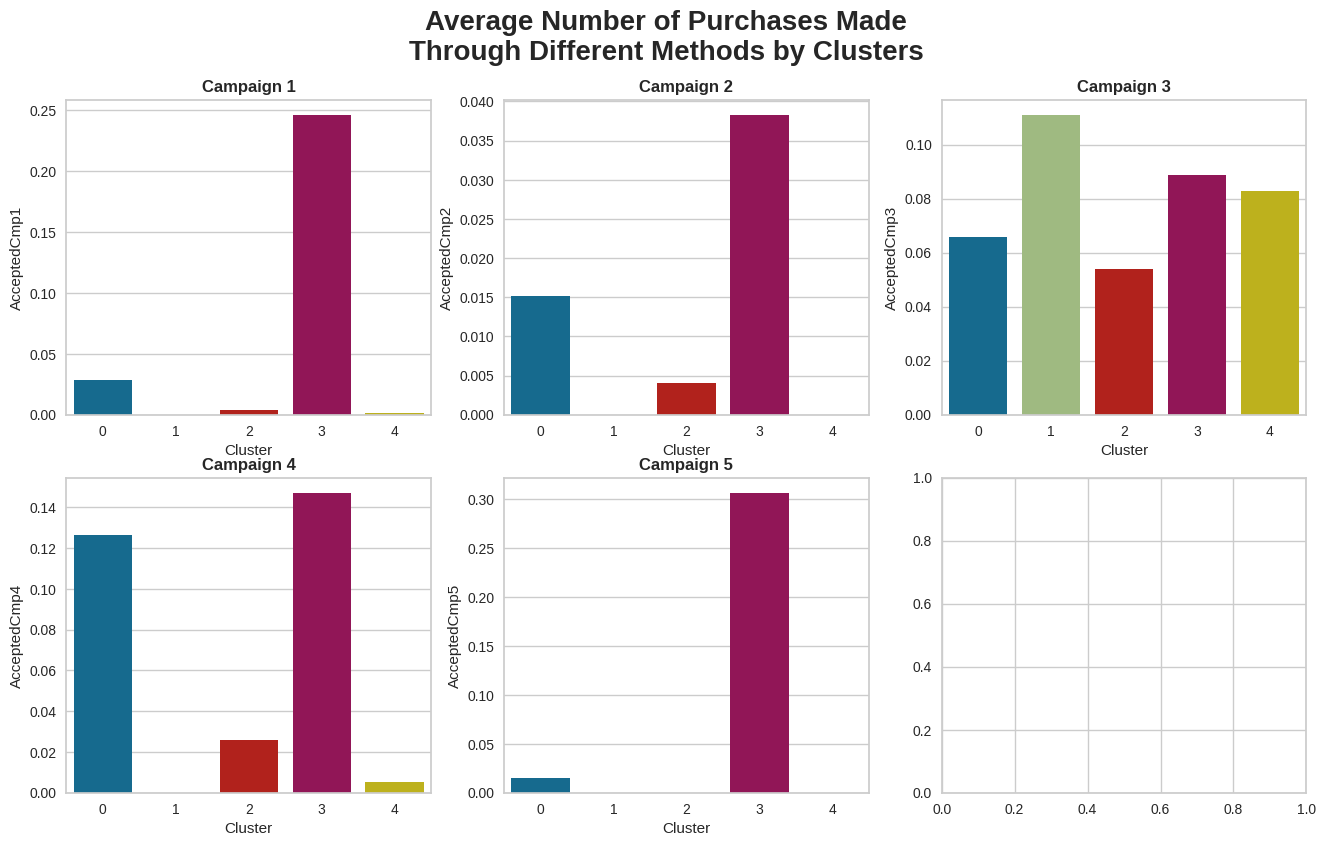

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(16,9))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=dataframe, x='Cluster', y='AcceptedCmp1',  ci=None, ax=axes[0])
axes[0].set_title('Campaign 1', weight='bold')
sns.barplot(data=dataframe, x='Cluster', y='AcceptedCmp2',  ci=None, ax=axes[1])
axes[1].set_title('Campaign 2', weight='bold')
sns.barplot(data=dataframe, x='Cluster', y='AcceptedCmp3',  ci=None, ax=axes[2])
axes[2].set_title('Campaign 3', weight='bold')
sns.barplot(data=dataframe, x='Cluster', y='AcceptedCmp4',  ci=None, ax=axes[3])
axes[3].set_title('Campaign 4', weight='bold')
sns.barplot(data=dataframe, x='Cluster', y='AcceptedCmp5',  ci=None, ax=axes[4])
axes[4].set_title('Campaign 5', weight='bold')
# sns.barplot(data=dataframe, x='Cluster', y='AcceptedCmp6',  ci=None, ax=axes[5])
# axes[5].set_title('Campaign 6', weight='bold')